In [1]:
# 토큰화 클래스
from keras.preprocessing.text import Tokenizer

In [36]:
tok = Tokenizer()
text = 'Regret for wasted time is more wasted time'

In [22]:
# 글자단위 토큰화
tok.fit_on_texts(text)
tok.word_index

{'e': 1,
 't': 2,
 'r': 3,
 's': 4,
 'i': 5,
 'm': 6,
 'o': 7,
 'w': 8,
 'a': 9,
 'd': 10,
 'g': 11,
 'f': 12}

In [37]:
# 단어단위 토큰화
tok.fit_on_texts([text])
tok.word_index

{'wasted': 1, 'time': 2, 'regret': 3, 'for': 4, 'is': 5, 'more': 6}

In [38]:
test = 'Regret for wasted hour is more wasted hour'
seq = tok.texts_to_sequences([test])

In [46]:
from keras.preprocessing.sequence import pad_sequences
# pad_sequeces : 샘플의 길이를 동일하게 해주는 함수
pad_sequences([[1,2,3],[2,3,4,5],[6,7]], maxlen=3, padding='post')
# padding='post' => 0이 뒤에 / 'pre' =? 0이 앞에

array([[1, 2, 3],
       [3, 4, 5],
       [6, 7, 0]])

# 워드 임베딩

In [ ]:
# 워드 임베딩 : 문장 내의 단어들을 밀집벡터로 만드는 작업
# 원핫벡터(희소벡터 - 고차원,기억장소낭비)  ex> 001000...00000 (tiger)
# 밀집벡터 (저차원, 실수값)        ex> [0.1, -1.5, 1.9, 2,4] (tiger)

# ex> text = [[0,1,2,3],[3,4,1,5]]
#   => Embedding(6,2,4)  # 단어개수:6, 벡터크기:2, 시퀀스길이:4
#   => 0:[1.3,1.5], 1:[2.5,4.1] .. 

In [54]:
# functional API를 이용한 모델 설계
from keras.layers import Input, Dense, LSTM
from keras.models import  Model

# 신경망 생성
inp = Input(shape=(10,))  # 10개 입력, 입력층
h1 = Dense(32, activation='relu')(inp)
h2 = Dense(16, activation='relu')(h1)
outp = Dense(1, activation='relu')(h2)

# 모델 생성
model = Model(inputs=inp, outputs=outp)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# model.fit(xdata, ydata, epochs=10, batch_size=10)

In [56]:
# RNN 구조를 api 형식으로
inp = Input(shape=(50,1))
h1 = LSTM(10)(inp)
h2 = Dense(10, activation='relu')(h1)
outp = Dense(1, activation='sigmoid')(h2)

model = Model(inputs=inp, outputs=outp)

In [138]:
texts = ['먹고 싶은 사과','먹고 싶은 바나나','길고 길고 바나나 바나나','저는 저는 과일이 좋아요']

# 토큰화
tok = Tokenizer(num_words=3)
tok.fit_on_texts(texts) # 단어사전 생성

print(tok.word_index)  

tok.texts_to_matrix(texts, mode='binary')

{'바나나': 1, '먹고': 2, '싶은': 3, '길고': 4, '저는': 5, '사과': 6, '과일이': 7, '좋아요': 8}


array([[0., 0., 1.],
       [0., 1., 1.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [81]:
# MLP로 텍스트 분류
from keras.preprocessing.text import Tokenizer
import numpy as np

texts = ['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나 바나나','저는 과일이 좋아요']

# 토큰화
tok = Tokenizer()
tok.fit_on_texts(texts) # 단어사전 생성

print(tok.word_index)  
# {'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}

tok.texts_to_matrix(texts, mode='binary')  #  mode: "binary", "count", "tfidf", "freq"

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


array([[0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [82]:
# 실습 
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [84]:
# 뉴스 데이터 불러오기
newsData = fetch_20newsgroups(subset='train')  # subset = train, test, all

In [92]:
print(newsData.keys())
print(newsData.target)
print(newsData.target_names)

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
[7 4 4 ... 3 1 8]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [99]:
df = pd.DataFrame(newsData.data, columns=['email'])
df['target'] = newsData.target
df

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
email     11314 non-null object
target    11314 non-null int32
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


target
0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
dtype: int64

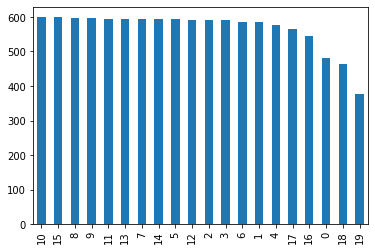

In [117]:
df.info()
# null 조사
df.isnull().values.any()

df['email'].nunique()  # 11314개 샘플
df['target'].nunique()  # 20가지 주제

# target별 샘플 수 조사
df['target'].value_counts().plot.bar()

df.groupby('target').size()

In [119]:
# test데이터 불러오기
newsDataTest = fetch_20newsgroups(subset='test', shuffle=True)

In [122]:
# train 데이터 저장
trainEmail = df['email']
trainLabel = df['target']

# test 데이터 저장
testEmail = newsDataTest.data  # test 본문
testLabel = newsDataTest.target  # test target

In [131]:
def preData(trainData, testData, mode) : # 전처리함수
    
    tok = Tokenizer(num_words=10000)  # 빈도수가 가장 높은 상위 10000개의 단어를 사용하여 토크나이저 구성
    tok.fit_on_texts(trainData)
    
    xTrain = tok.texts_to_matrix(trainData, mode=mode)
    xTest = tok.texts_to_matrix(testData, mode=mode)
    
    return xTrain, xTest, tok.index_word

xTrain, xTest, index_word = preData(trainEmail, testEmail, 'binary')

In [136]:
# label 데이터 원핫인코딩
yTrain = to_categorical(trainLabel, num_classes=20)
yTest = to_categorical(testLabel, num_classes=20)

In [145]:
index_word[10000]

'proportion'

In [151]:
# MLP 기반 텍스트 분류 모델
from keras.layers import Dropout
from keras.models import Sequential

In [236]:
def fitEval(xTrain, yTrain, xTest, yTest) : # fit & evaluate 수행 함수
    # 모델 구성
    model = Sequential()                                 # (10000,)
    model.add(Dense(256, activation='relu', input_shape=[10000]))
    model.add(Dropout(0.5))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(20, activation='softmax'))
    
    # 모델 환경 설정
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # 모델 학습
    model.fit(xTrain, yTrain, epochs=3, batch_size=128, validation_split=0.1, verbose=1)
    # 모델 평가
    score = model.evaluate(xTest, yTest, batch_size=128)
    
    return score[1], model

In [199]:
# 모델 훈련 및 평가
# score : 모델 정확도
score = fitEval(xTrain, yTrain, xTest, yTest)
score

Train on 10182 samples, validate on 1132 samples
Epoch 1/1
7532/7532 [==============================] - 1s 135us/step


(0.7727031111717224, None)

In [164]:
xTrain, xTest, _ = preData(trainEmail, testEmail, 'tfidf')
score = fitEval(xTrain, yTrain, xTest, yTest)
score

Train on 10182 samples, validate on 1132 samples
Epoch 1/1
7532/7532 [==============================] - 1s 137us/step


0.7784121036529541

In [230]:
news = ['''
By Kim Hyun-bin
SK Telecom, the country's leading mobile carrier, plans to expand its 5G subscriber base along with newly developing innovative services this year.
"We have acquired 2.65 million subscribers as of the end of the first quarter, which resulted in an increase of MNO (mobile network operator) sales," SKT said during a conference call to investors, Thursday. "This year's goal is to expand our 5G subscriber base as well as create new services."
The company aims to increase its presence in the global game market in cooperation with foreign gaming firms including Singtel of Singapore and AIS of Thailand.
"As part of our contactless business, in cooperation with Singtel of Singapore and AIS of Thailand, we have acquired an 800 million consumer base in the Southeast Asia game market," SKT said.
SK Telecom Logo. Courtesy of SKT
The leading mobile carrier also plans to excel in the over-the-top (OTT) platform by investing 60 billion won and through partnerships with global content powerhouses.
"We plan to invest 60 billion won in original content for our OTT Wavve platform," the company said. "Through a partnership with NBC Universal, we plan to increase the value of our Wavve platform."
SKT's net income dropped 17.9 percent from a year earlier due to reduced equity gains and investments related to its 5G service.
In a regulatory filing Thursday, SKT reported net income of 306.8 billion won (US$250 million) in the January-March period, on a consolidated basis, down from 373.6 billion won a year ago.
The company said operating profit for the first three months of the year fell 6.4 percent year-on-year to 302 billion won, although its annual revenue increased 2.7 percent year-on-year to 4.45 trillion won.
The country's leading mobile carrier attributed its profit decline to equity ties with chip-making affiliate SK hynix Inc.
SKT has a 20 percent stake in SK hynix, which reported a 41 percent drop in net profit in the first quarter.
Increased marketing expenses for the 5G service and depreciation costs also dragged down the bottom line, according to the mobile carrier.
However, total sales rose 3.9 percent to 2.92 trillion won year-on-year. Although there was a reduction in roaming sales, it was offset by the increase in 5G subscribers, which has shown a steady increase since the second quarter of last year.
SKT has ranked first for 23 consecutive years on the National Customer Satisfaction Index (NCSI) and has acquired 2.65 million 5G subscribers, topping the telecommunications market.
The company plans to create technological advancements and differentiate its product lines in cloud gaming, AR/VR services and customer benefits, as well as enhancing 5G Cluster-based marketing.
SK Broadband's first-quarter sales increased 8.2 percent compared to the previous year, recording 823.5 billion won, mostly attributed to the growth in the IPTV (internet protocol television) sector.
Through the successful merger with T Broad last April, the company was able to acquire 8.21 million pay-per-view and 6.48 million internet subscribers.
"For continuous long-term growth in the last year, we have established a diverse portfolio regarding MNO, media, security and commerce," Yoon Poong-young, head of the Corp 1 Center at SKT, said. "Through sustainable growth in four key business sectors we will strategically overcome the crisis."
''']

In [231]:
_,news, _ = preData(trainEmail, news, 'tfidf')

In [238]:
# 모델 훈련 및 평가 / 모델 저장
score, model = fitEval(xTrain, yTrain, xTest, yTest)
score

Train on 10182 samples, validate on 1132 samples
Epoch 1/3
10182/10182 [==============================] - 5s 507us/step - loss: 2.2690 - accuracy: 0.3492 - val_loss: 0.8176 - val_accuracy: 0.8419
Epoch 2/3
10182/10182 [==============================] - 4s 434us/step - loss: 0.8289 - accuracy: 0.7675 - val_loss: 0.4083 - val_accuracy: 0.8993
Epoch 3/3
7532/7532 [==============================] - 1s 151us/step


0.8204991817474365

In [244]:
pred_idx = np.argmax(model.predict(news))
newsData.target_names[pred_idx]